In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [34]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date = query_date.strftime("%Y-%m-%d")
query_date

'2016-08-23'

In [47]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date > query_date).order_by(measurement.date).all()
precip_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [55]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip_data, columns = ["date", "prcp"])
df = df.set_index("date")
df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [56]:
# Sort the dataframe by date
df = df.sort_values(by = "date")
df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data


In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = df.describe()
summary["prcp"] = summary["prcp"].map('{:.2f}'.format)
summary

,prcp
count,2015.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [77]:
# Design a qus (i.e. what stations have the most rows?)
# List the stations and the countery to find the most active stations in descending order.
active_stations = session.query(func.count(measurement.station), measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [121]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(f'The lowest temperature is {most_active[0][0]} degrees')
print(f'The hightest temperature is {most_active[0][1]} degrees')
print(f'The average temperature is {most_active[0][2]} degrees')

The lowest temperature is 54.0 degrees
The hightest temperature is 85.0 degrees
The average temperature is 71.66378066378067 degrees


In [112]:
# Using the most active station id
tobs_filter = session.query(measurement.station, func.count(measurement.station)).filter(measurement.date > query_date).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
tobs_filter

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

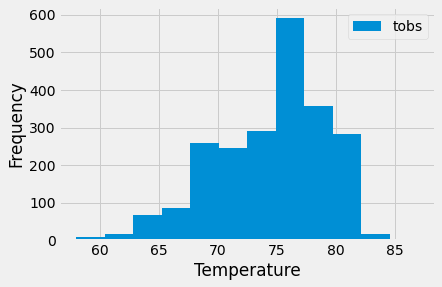

In [122]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_query = session.query(measurement.tobs).filter(measurement.date > query_date).all()
df = pd.DataFrame(tobs_query, columns = ["tobs"])
plt.hist(df, bins = 12, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")

plt.show()

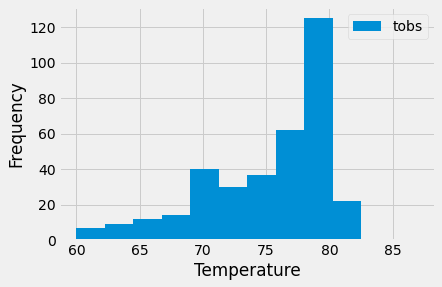

In [123]:
tobs_query = session.query(measurement.tobs).filter(measurement.date > query_date).filter(measurement.station == "USC00519397").all()
df = pd.DataFrame(tobs_query, columns = ["tobs"])
plt.hist(df, bins = 12, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")

plt.show()

# Close session

In [ ]:
# Close Session
session.close()